# HW 3 - Problem 1 (Gradient Method Logistic Regression)

Use the data set "LogisticData.txt" to implement the gradient descent method for the Logistic Regression. Find the coefficients $w$ and $b$ using the stopping criteria $||\nabla L(x)||<\epsilon$ where $\epsilon=10^{-4}.$ Please choose a step size $\alpha$ and show the number of iterations needed.

In [64]:
import numpy as np
import matplotlib.pyplot as plt

Coefficients (w and b): [-4.07191802  1.50264884]
Number of iterations: 167


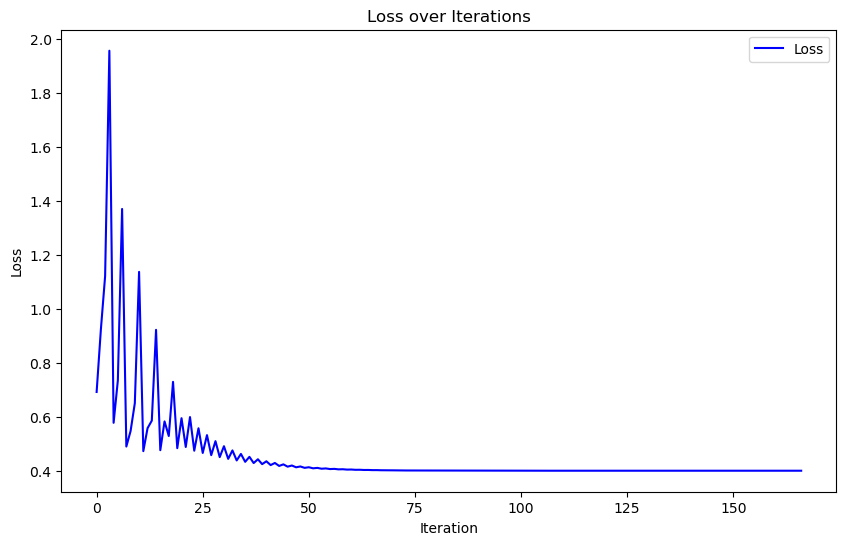

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.loadtxt('LogisticData.txt')
X = data[0, :].reshape(-1, 1)  #features
y = data[1, :].reshape(-1, 1)  #labels 

# Add (column of ones) to the input data
X = np.hstack((np.ones((X.shape[0], 1)), X))

def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def compute_loss_and_gradient(X, y, w):
    m = X.shape[0]
    predictions = sigmoid(np.dot(X, w))
    loss = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    gradient = 1/m * np.dot(X.T, (predictions - y))
    return loss, gradient

def gradient_descent(X, y, alpha, epsilon):
    m, n = X.shape
    w = np.zeros((n, 1))  
    iteration = 0
    losses = []
    while True:
        iteration += 1
        loss, gradient = compute_loss_and_gradient(X, y, w)
        w -= alpha * gradient 
        losses.append(loss)
        grad_norm = np.linalg.norm(gradient)
        if grad_norm < epsilon:
            break
    return w, iteration, losses

# Parameters
alpha = 1.73  # step size
epsilon = 1e-4  # tolerance

# Perform gradient descent
w, iterations, losses = gradient_descent(X, y, alpha, epsilon)

# Print the results
print("Coefficients (w and b):", w.flatten())
print("Number of iterations:", iterations)

# Plot Loss over Iterations
plt.figure(figsize=(10, 6))
plt.plot(range(len(losses)), losses, 'b-', label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.legend()
plt.show()